In [1]:
library(tidyverse)

library(modelr)
options(na.action = na.warn)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


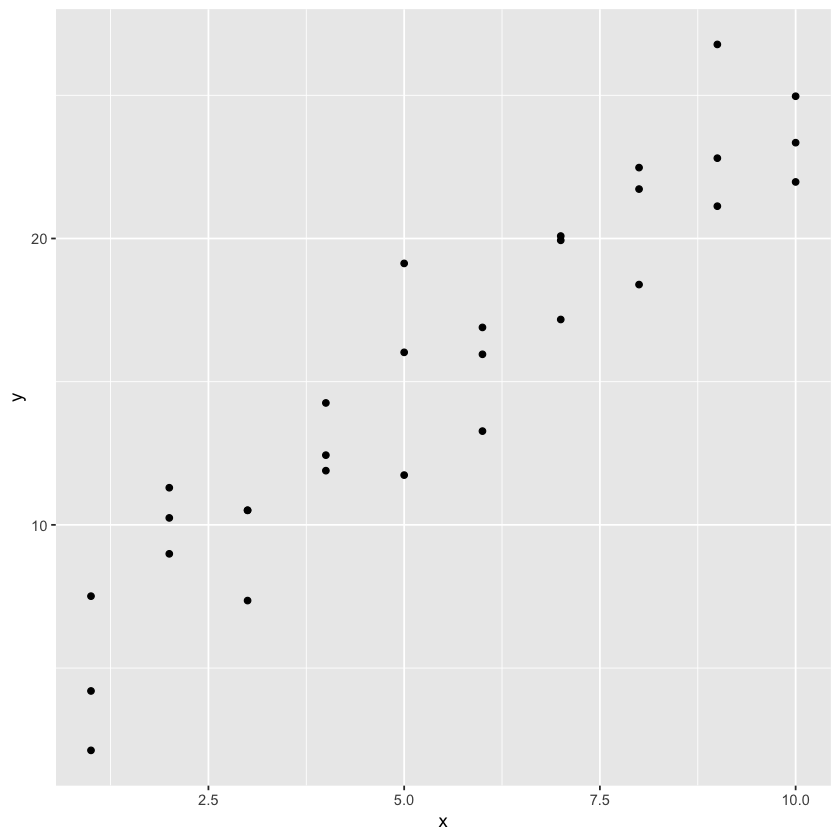

In [2]:
ggplot(sim1, aes(x, y)) + 
  geom_point()

In [5]:
runif(10,-20,40) # each of 10 numbers intercepts between -20 n 40 has equal chance 
runif(10, -5, 5) # each of 10 numbers slopes between -5 n 5 has equal chance 

[1] -16.214648  32.856536  -3.771853  -5.785223 -18.722936  -3.196498
 [7]  12.020808   4.792465  15.857688 -16.155788

[1]  4.10823073 -0.14219530 -0.04565583  0.82620871  3.06493383  0.81342318
 [7]  2.28945848 -3.36491047  2.52908758 -3.36525903

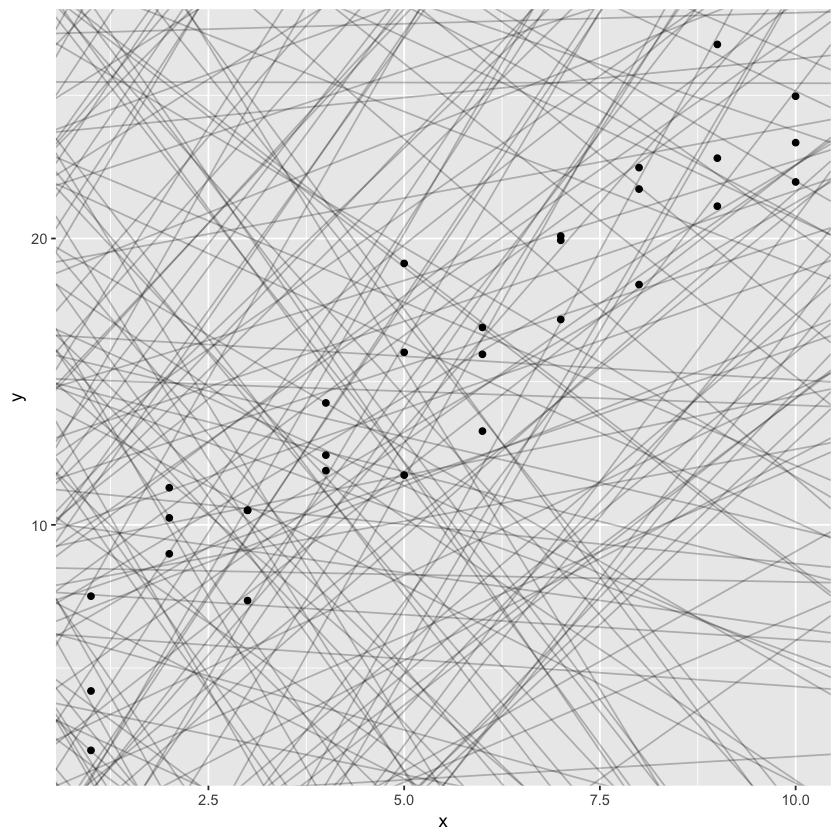

In [6]:
models <- tibble(
  a1 = runif(250, -20, 40),
  a2 = runif(250, -5, 5)
)

ggplot(sim1, aes(x, y)) + 
  geom_point() +
  geom_abline(aes(intercept = a1, slope = a2), data = models, alpha = 1/4)


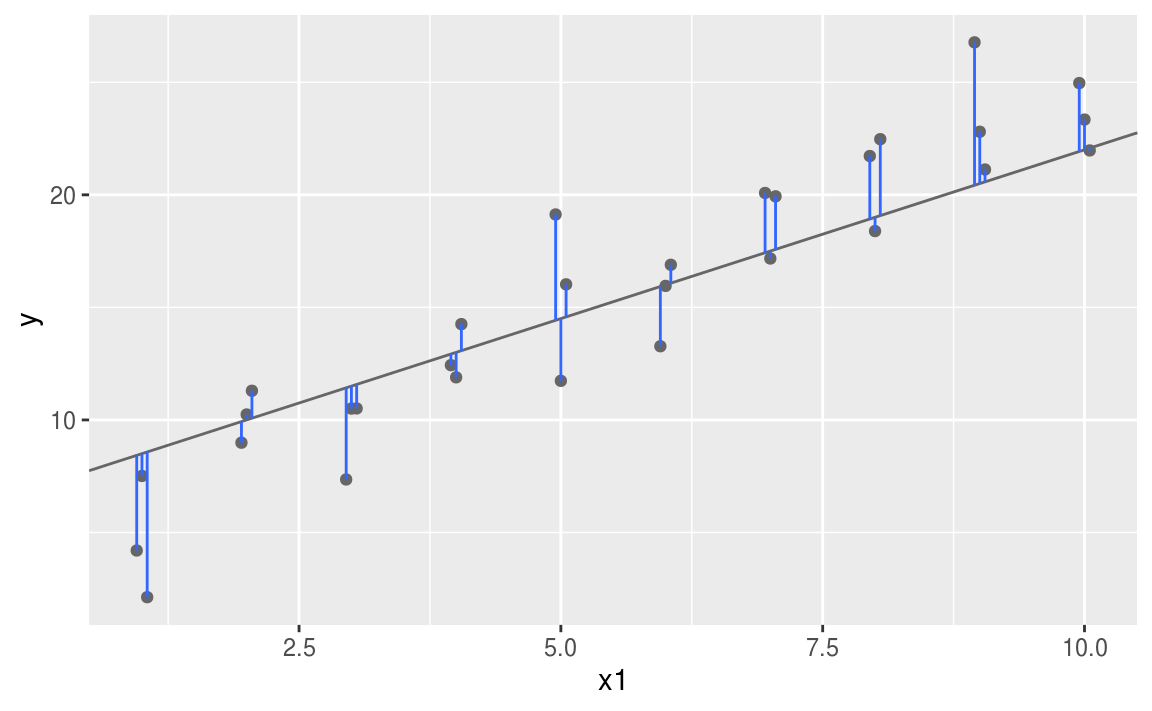

In [9]:
head(sim1)

x,y
1,4.199913
1,7.510634
1,2.125473
2,8.988857
2,10.243105
2,11.296823


In [10]:
model1 <- function(a, data) {
  a[1] + data$x * a[2]
}
model1(c(7, 1.5), sim1)

[1]  8.5  8.5  8.5 10.0 10.0 10.0 11.5 11.5 11.5 13.0 13.0 13.0 14.5 14.5 14.5
[16] 16.0 16.0 16.0 17.5 17.5 17.5 19.0 19.0 19.0 20.5 20.5 20.5 22.0 22.0 22.0

In [13]:
c(7, 1.5)  # <- mod
head(sim1) # <- data

[1] 7.0 1.5

x,y
1,4.199913
1,7.510634
1,2.125473
2,8.988857
2,10.243105
2,11.296823


In [17]:
measure_distance <- function(mod, data) {
  diff <- data$y - model1(mod, data)
  print(str(diff))
  sqrt(mean(diff ^ 2))
}
measure_distance(c(7, 1.5), sim1)

 num [1:30] -4.3 -0.989 -6.375 -1.011 0.243 ...
NULL


[1] 2.665212

In [22]:
sim1_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), sim1)
}
print(models)
models <- models %>% 
  mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))
models

# A tibble: 250 x 3
       a1     a2  dist
    <dbl>  <dbl> <dbl>
 1  -3.59 -3.86  43.8 
 2   9.99  2.63   9.37
 3  13.0   4.35  22.5 
 4  -9.28  0.933 20.0 
 5  -3.64  4.76  10.7 
 6  -2.56  4.06   7.48
 7   1.77  1.29   7.29
 8  35.9  -0.630 18.8 
 9 -18.1  -0.573 37.6 
10  38.0   4.98  50.6 
# … with 240 more rows
 num [1:30] 11.65 14.96 9.57 20.3 21.55 ...
NULL
 num [1:30] -8.43 -5.12 -10.5 -6.27 -5.02 ...
NULL
 num [1:30] -13.17 -9.86 -15.25 -12.73 -11.47 ...
NULL
 num [1:30] 12.5 15.9 10.5 16.4 17.7 ...
NULL
 num [1:30] 3.08 6.39 1.01 3.11 4.36 ...
NULL
 num [1:30] 2.699 6.009 0.624 3.428 4.683 ...
NULL
 num [1:30] 1.138 4.449 -0.937 4.633 5.887 ...
NULL
 num [1:30] -31.1 -27.8 -33.2 -25.7 -24.4 ...
NULL
 num [1:30] 22.9 26.2 20.8 28.3 29.5 ...
NULL
 num [1:30] -38.7 -35.4 -40.8 -38.9 -37.7 ...
NULL
 num [1:30] -29.9 -26.5 -31.9 -23.6 -22.3 ...
NULL
 num [1:30] 4.34 7.65 2.26 11.2 12.46 ...
NULL
 num [1:30] -6.39 -3.08 -8.46 2.28 3.54 ...
NULL
 num [1:30] 7.93 11.24 5.86 15.03 16

a1,a2,dist
-3.585781,-3.86253719,43.816821
9.994873,2.63300981,9.371153
13.024348,4.34667894,22.518806
-9.281082,0.93334342,20.026071
-3.642954,4.76174399,10.710863
-2.558277,4.05943405,7.481653
1.768145,1.29382823,7.286338
35.942059,-0.62977198,18.760607
-18.122741,-0.57303804,37.603608
37.967367,4.97794652,50.590396


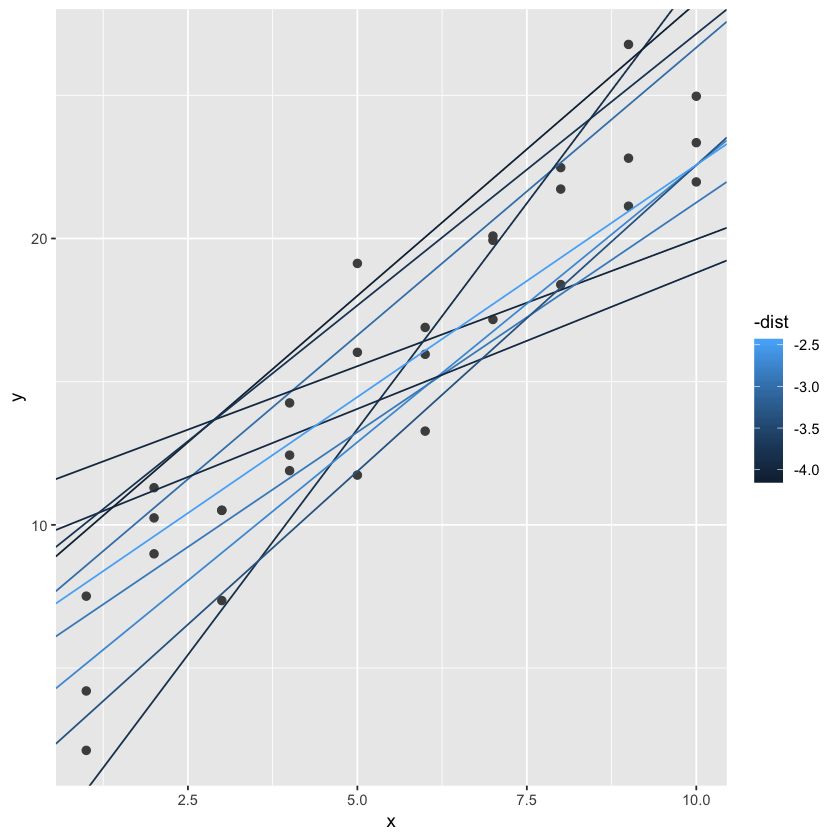

In [23]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = -dist), 
    data = filter(models, rank(dist) <= 10)
  )

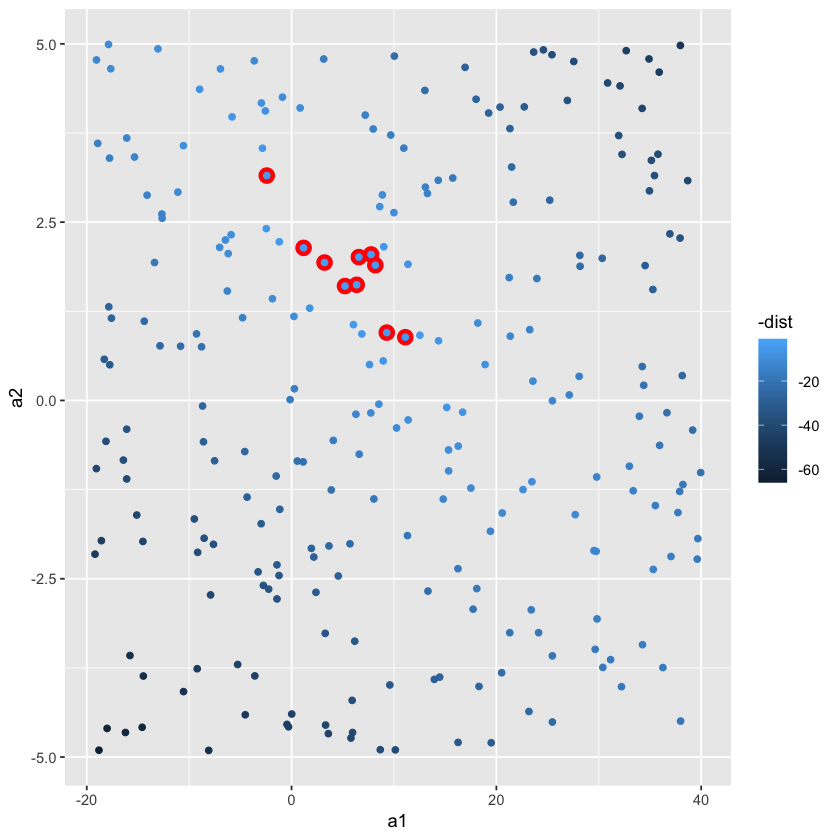

In [24]:
ggplot(models, aes(a1, a2)) +
  geom_point(data = filter(models, rank(dist) <= 10), size = 4, colour = "red") +
  geom_point(aes(colour = -dist))

In [28]:
seq(-5, 20, length = 26) # but he uses 25 as length
seq(-5, 20, length = 25) 

[1] -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
[26] 20

[1] -5.0000000 -3.9583333 -2.9166667 -1.8750000 -0.8333333  0.2083333
 [7]  1.2500000  2.2916667  3.3333333  4.3750000  5.4166667  6.4583333
[13]  7.5000000  8.5416667  9.5833333 10.6250000 11.6666667 12.7083333
[19] 13.7500000 14.7916667 15.8333333 16.8750000 17.9166667 18.9583333
[25] 20.0000000

 num [1:30] 8.2 11.51 6.13 11.99 13.24 ...
NULL
 num [1:30] 7.16 10.47 5.08 10.95 12.2 ...
NULL
 num [1:30] 6.12 9.43 4.04 9.91 11.16 ...
NULL
 num [1:30] 5.07 8.39 3 8.86 10.12 ...
NULL
 num [1:30] 4.03 7.34 1.96 7.82 9.08 ...
NULL
 num [1:30] 2.992 6.302 0.917 6.781 8.035 ...
NULL
 num [1:30] 1.95 5.261 -0.125 5.739 6.993 ...
NULL
 num [1:30] 0.908 4.219 -1.166 4.697 5.951 ...
NULL
 num [1:30] -0.133 3.177 -2.208 3.656 4.91 ...
NULL
 num [1:30] -1.18 2.14 -3.25 2.61 3.87 ...
NULL
 num [1:30] -2.22 1.09 -4.29 1.57 2.83 ...
NULL
 num [1:30] -3.2584 0.0523 -5.3329 0.5305 1.7848 ...
NULL
 num [1:30] -4.3 -0.989 -6.375 -0.511 0.743 ...
NULL
 num [1:30] -5.342 -2.031 -7.416 -1.553 -0.299 ...
NULL
 num [1:30] -6.38 -3.07 -8.46 -2.59 -1.34 ...
NULL
 num [1:30] -7.43 -4.11 -9.5 -3.64 -2.38 ...
NULL
 num [1:30] -8.47 -5.16 -10.54 -4.68 -3.42 ...
NULL
 num [1:30] -9.51 -6.2 -11.58 -5.72 -4.47 ...
NULL
 num [1:30] -10.55 -7.24 -12.62 -6.76 -5.51 ...
NULL
 num [1:30] -11.59 -8.28 -13.67 -7.8 -6.5

'data.frame':	625 obs. of  3 variables:
 $ a1  : num  -5 -3.958 -2.917 -1.875 -0.833 ...
 $ a2  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ dist: num  15.5 14.4 13.4 12.4 11.5 ...


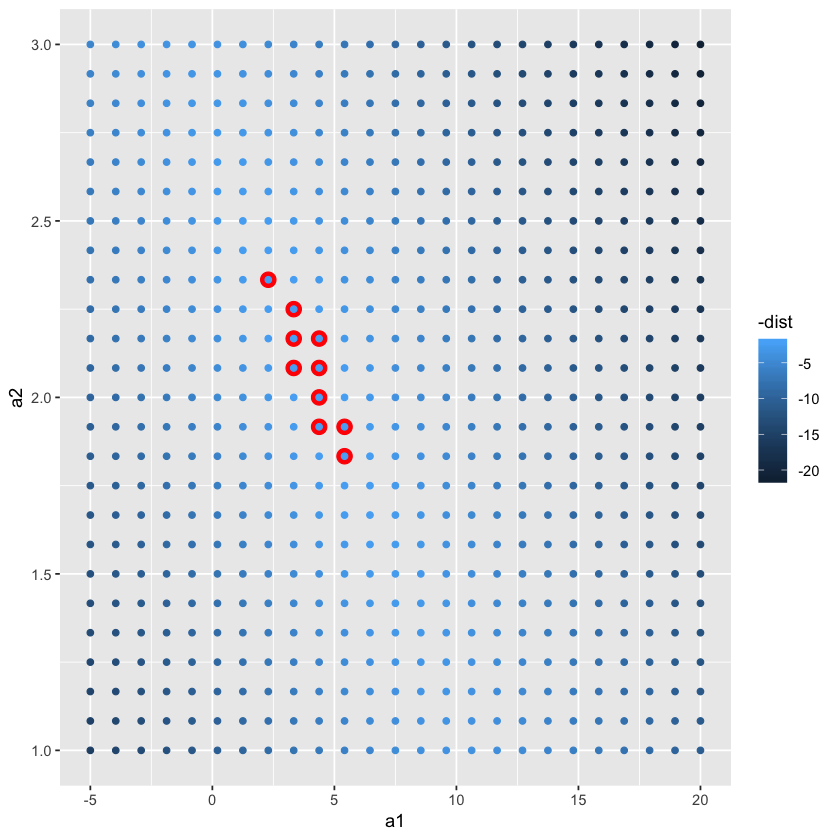

In [31]:
grid <- expand.grid(
  a1 = seq(-5, 20, length = 25),
  a2 = seq(1, 3, length = 25)
  ) %>% 
  mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))
str(grid)

grid %>% 
  ggplot(aes(a1, a2)) +
  geom_point(data = filter(grid, rank(dist) <= 10), size = 4, colour = "red") +
  geom_point(aes(colour = -dist)) 

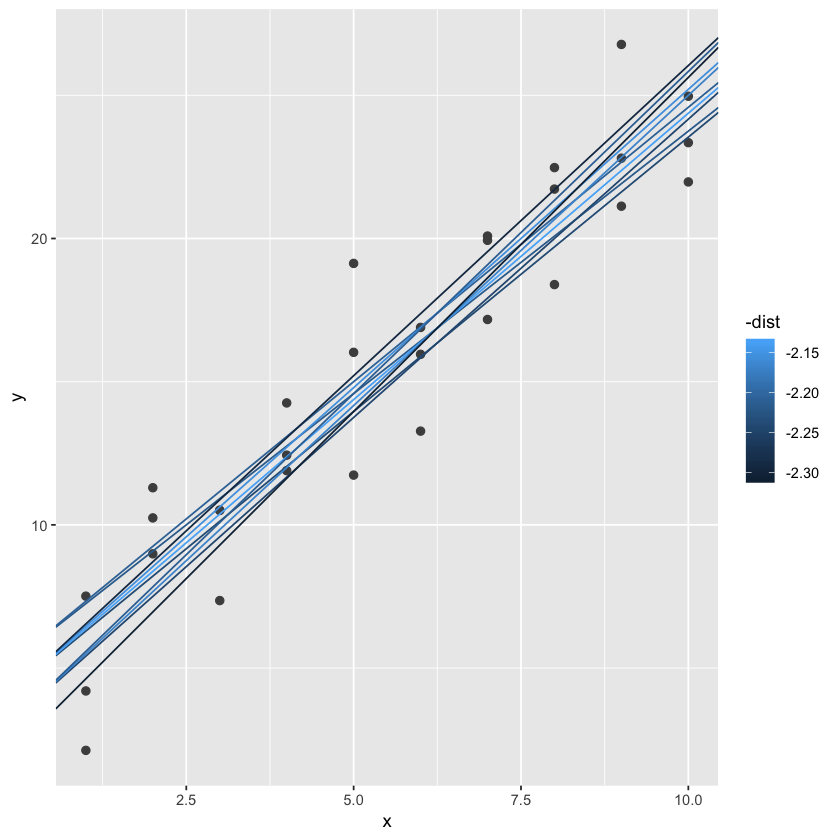

In [32]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = -dist), 
    data = filter(grid, rank(dist) <= 10)
  )

 num [1:30] 4.2 7.51 2.13 8.99 10.24 ...
NULL
 num [1:30] 4.1 7.41 2.03 8.89 10.14 ...
NULL
 num [1:30] 4.1 7.41 2.03 8.79 10.04 ...
NULL
 num [1:30] 4 7.31 1.93 8.69 9.94 ...
NULL
 num [1:30] 3.9 7.21 1.83 8.54 9.79 ...
NULL
 num [1:30] 3.9 7.21 1.83 8.44 9.69 ...
NULL
 num [1:30] 3.8 7.11 1.73 8.21 9.47 ...
NULL
 num [1:30] 3.6 6.91 1.53 7.96 9.22 ...
NULL
 num [1:30] 3.35 6.66 1.28 7.55 8.81 ...
NULL
 num [1:30] 3.25 6.56 1.18 7.23 8.48 ...
NULL
 num [1:30] 2.92 6.24 0.85 6.57 7.82 ...
NULL
 num [1:30] 2.47 5.79 0.4 5.91 7.16 ...
NULL
 num [1:30] 1.812 5.123 -0.262 4.754 6.009 ...
NULL
 num [1:30] 1.387 4.698 -0.687 3.773 5.027 ...
NULL
 num [1:30] 0.406 3.717 -1.668 1.884 3.138 ...
NULL
 num [1:30] 0.275 3.586 -1.8 1.958 3.212 ...
NULL
 num [1:30] 0.937 4.248 -1.137 3.111 4.365 ...
NULL
 num [1:30] 0.512 3.823 -1.562 2.129 3.384 ...
NULL
 num [1:30] 0.837 4.148 -1.237 2.786 4.04 ...
NULL
 num [1:30] 1.487 4.798 -0.587 4.098 5.352 ...
NULL
 num [1:30] 1 4.31 -1.07 3.11 4.37 ...
NULL

[1] 4.222248 2.051204

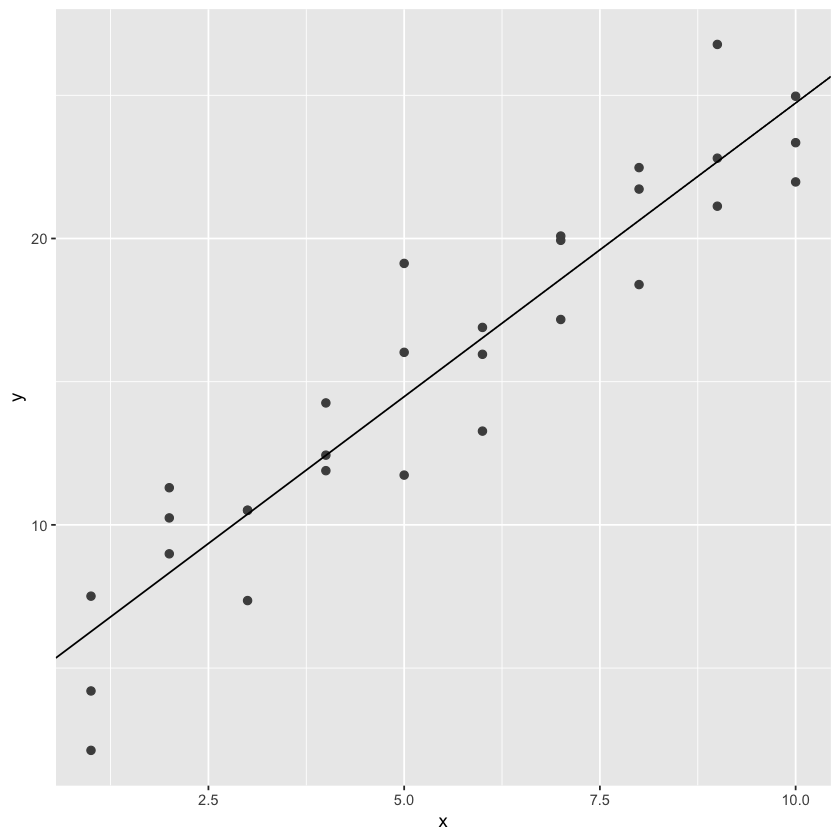

In [33]:
best <- optim(c(0, 0), measure_distance, data = sim1)
best$par

ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, colour = "grey30") + 
  geom_abline(intercept = best$par[1], slope = best$par[2])

In [34]:
best$par

[1] 4.222248 2.051204

In [35]:
sim1_mod <- lm(y ~ x, data = sim1)
coef(sim1_mod)

(Intercept)           x 
   4.220822    2.051533

In [42]:
rep(1:10, each = 3)
rt(10, df = 2)

[1]  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8  9
[26]  9  9 10 10 10

[1] -1.91568936  0.86133780  0.53079815 -0.07503212  0.35049333 -1.10999137
 [7]  3.16041599 -0.18894110 -1.74359503 -2.03928217

In [43]:
sim1a <- tibble(
  x = rep(1:10, each = 3),
  y = x * 1.5 + 6 + rt(length(x), df = 2)
)


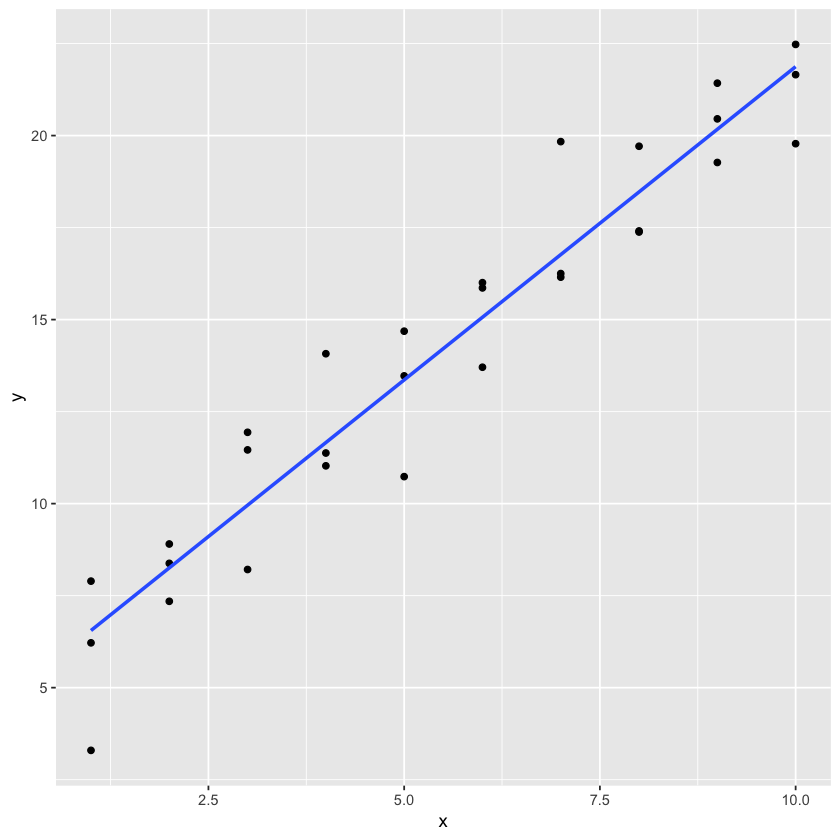

In [46]:
ggplot(sim1a, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

# A tibble: 360 x 3
       x     y   .id
   <int> <dbl> <int>
 1     1  7.43     1
 2     1  4.77     1
 3     1  7.54     1
 4     2  9.66     1
 5     2  9.15     1
 6     2  9.51     1
 7     3  9.30     1
 8     3  5.90     1
 9     3 11.7      1
10     4 13.9      1
# … with 350 more rows


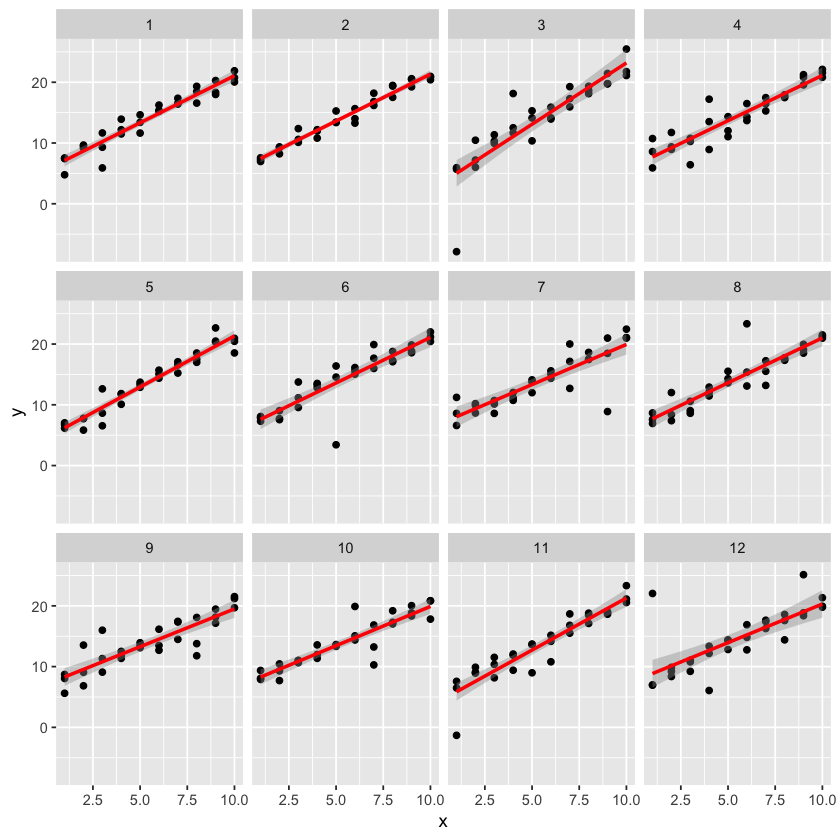

In [77]:
simt <- function(i) {
  tibble(
    x = rep(1:10, each = 3),
    y = x * 1.5 + 6 + rt(length(x), df = 2),
    .id = i
  )
}

sims <- map_df(1:12, simt)  # do simt 12 times and simt has 1:10 repeated 3x each = 30 * 12 = 360
print(sims)
ggplot(sims, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", colour = "red") +
  facet_wrap(~.id, ncol = 4)

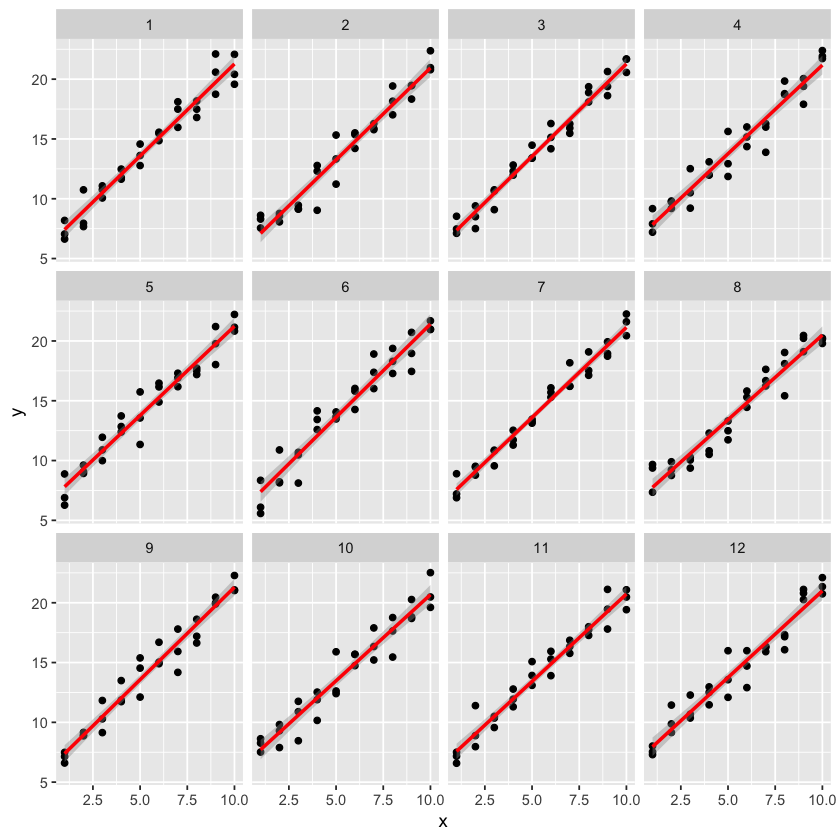

In [70]:
sim_norm <- function(i) {
  tibble(
    x = rep(1:10, each = 3),
    y = x * 1.5 + 6 + rnorm(length(x)),
    .id = i
  )
}

simdf_norm <- map_df(1:12, sim_norm)

ggplot(simdf_norm, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", colour = "red") +
  facet_wrap(~.id, ncol = 4)

In [95]:
seq(-5, 5, length.out = 100)

[1] -5.00000000 -4.89898990 -4.79797980 -4.69696970 -4.59595960 -4.49494949
  [7] -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 [13] -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 [19] -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 [25] -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 [31] -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 [37] -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 [43] -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 [49] -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
 [55]  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
 [61]  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
 [67]  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
 [73]  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
 [79]  2.87878788  2.97979798  3.08080808  3.18181818  3.28282828  3.38383838
 [85]  3.48484848  3.58585859  3.68686869  3.78787879  3.88888889  3.98989899
 [91]  4.09090909  4.19191919  4.29292929  4.39393939  4.49494949  4.59595960
 [97]  4.69696970  4.79797980  4.89898990  5.00000000

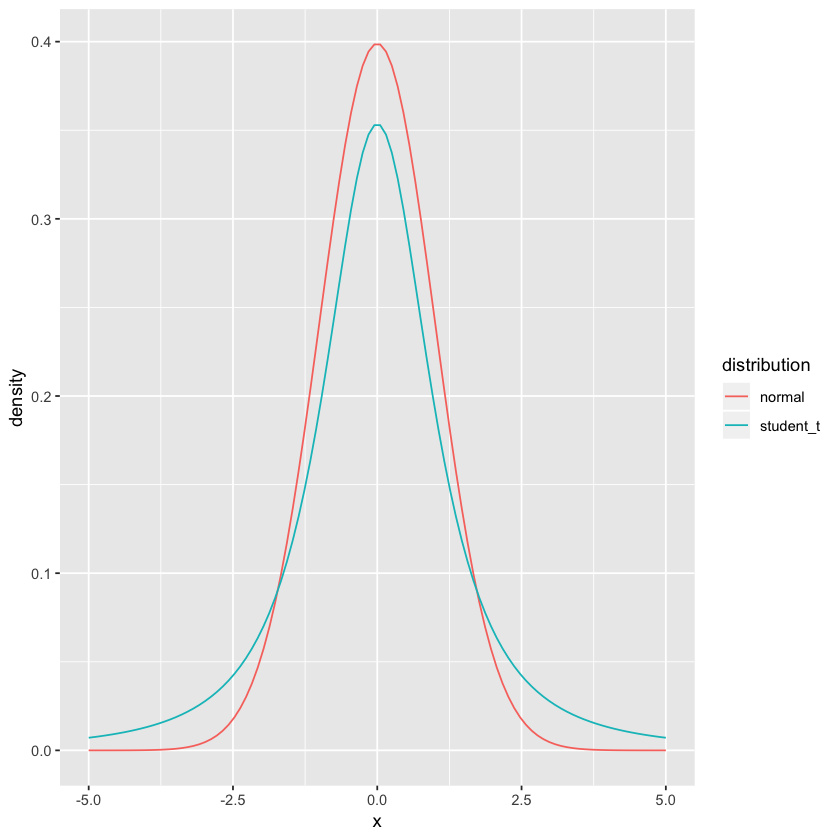

In [78]:
tibble(
  x = seq(-5, 5, length.out = 100),
  normal = dnorm(x),
  student_t = dt(x, df = 2)
) %>%
  gather(distribution, density, -x) %>%
  ggplot(aes(x = x, y = density, colour = distribution)) +
  geom_line()

In [96]:
pnorm(2, lower.tail = FALSE)

[1] 0.02275013

In [97]:
pt(2, df = 2, lower.tail = FALSE)

[1] 0.09175171

In [98]:
measure_distance <- function(mod, data) {
  diff <- data$y - model1(mod, data)
  mean(abs(diff))
}

In [99]:
make_prediction <- function(mod, data) {
  mod[1] + mod[2] * data$x
}

In [100]:
best <- optim(c(0, 0), measure_distance, data = sim1a)
best$par

[1] 5.057994 1.659690

In [101]:
measure_distance_ls <- function(mod, data) {
  diff <- data$y - (mod[1] + mod[2] * data$x)
  sqrt(mean(diff^2))
}

best <- optim(c(0, 0), measure_distance_ls, data = sim1a)
best$par

[1] 4.849392 1.702310

In [107]:
model3 <- function(a, data) {
  a[1] + data$x * a[2] + a[3]
}

In [108]:
measure_distance_3 <- function(a, data) {
  diff <- data$y - model3(a, data)
  sqrt(mean(diff^2))
}

In [109]:
best3a <- optim(c(0, 0, 0), measure_distance_3, data = sim1)
best3a$par

[1] 3.3672228 2.0515737 0.8528513

In [110]:
best3b <- optim(c(0, 0, 1), measure_distance_3, data = sim1)
best3b$par

[1] -3.469885  2.051509  7.690289

In [111]:
best3c <- optim(c(0, 0, 5), measure_distance_3, data = sim1)
best3c$par

[1] -1.124446  2.051520  5.345616

In [112]:
grid <- sim1 %>% 
  data_grid(x) 
grid

x
1
2
3
4
5
6
7
8
9
10


In [113]:
grid <- grid %>% 
  add_predictions(sim1_mod) 
grid

x,pred
1,6.272355
2,8.323888
3,10.375421
4,12.426954
5,14.478487
6,16.530020
7,18.581553
8,20.633087
9,22.684620
10,24.736153


(You can also use this function to add predictions to your original dataset.)

Next, we plot the predictions. You might wonder about all this extra work compared to just using geom_abline(). But the advantage of this approach is that it will work with any model in R, from the simplest to the most complex. You’re only limited by your visualisation skills. For more ideas about how to visualise more complex model types, you might try http://vita.had.co.nz/papers/model-vis.html.

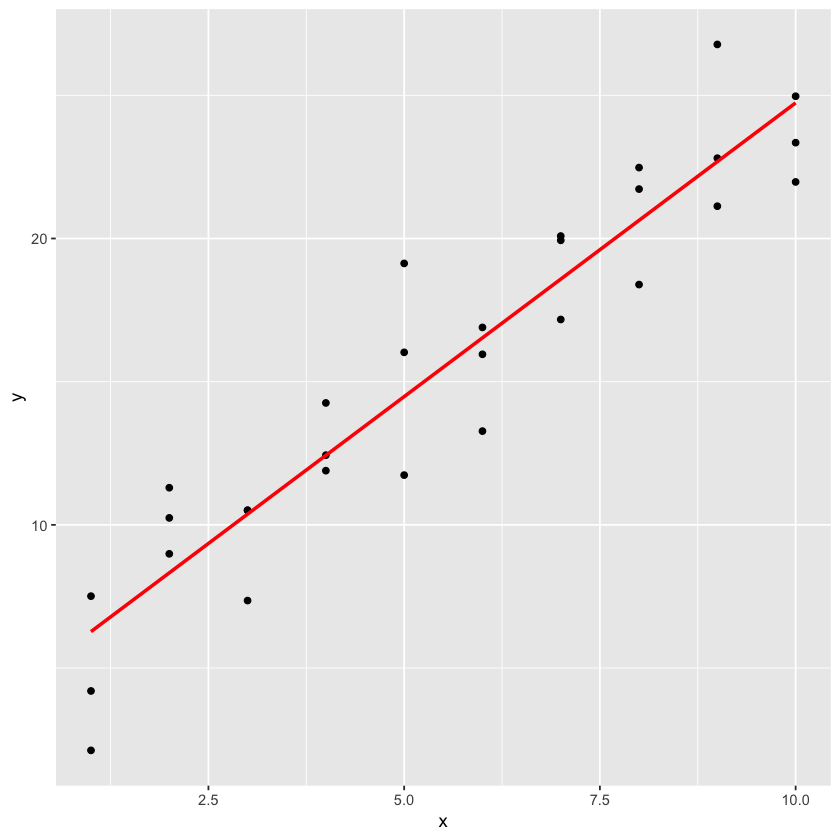

In [114]:
ggplot(sim1, aes(x)) +
  geom_point(aes(y = y)) +
  geom_line(aes(y = pred), data = grid, colour = "red", size = 1)

In [115]:
sim1 <- sim1 %>% 
  add_residuals(sim1_mod)
sim1

x,y,resid
1,4.199913,-2.072442018
1,7.510634,1.238279125
1,2.125473,-4.146882207
2,8.988857,0.664969362
2,10.243105,1.919217378
2,11.296823,2.972935148
3,7.356365,-3.019056466
3,10.505349,0.129928252
3,10.511601,0.136179642
4,12.434589,0.007634878


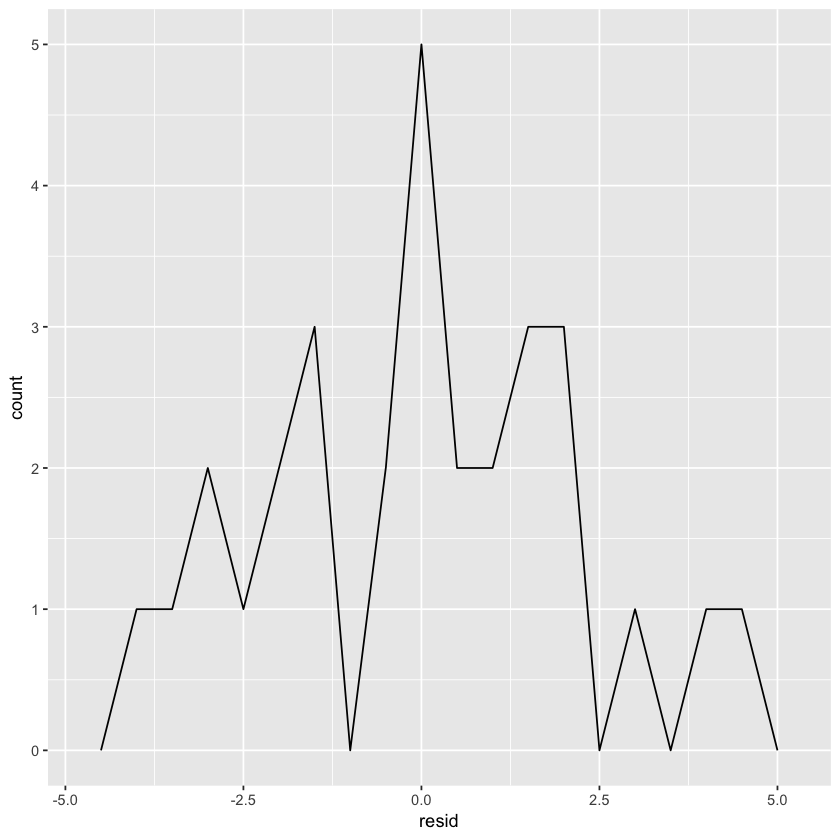

In [116]:
ggplot(sim1, aes(resid)) + 
  geom_freqpoly(binwidth = 0.5)

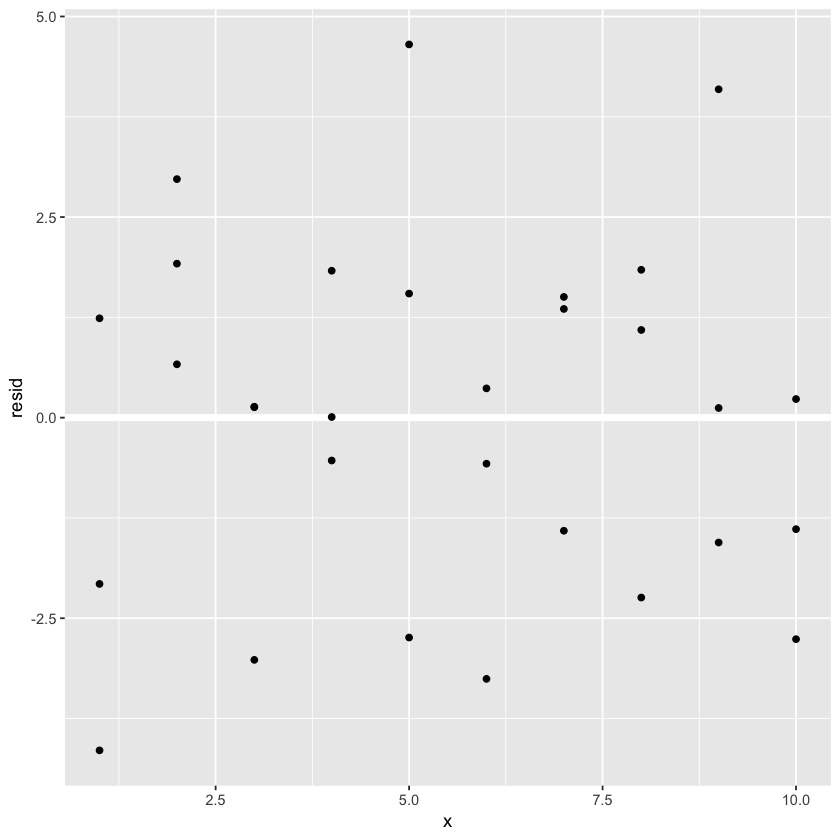

In [117]:
ggplot(sim1, aes(x, resid)) + 
  geom_ref_line(h = 0) +
  geom_point()

In [119]:
sim1_loess <- loess(y ~ x, data = sim1)
sim1_lm <- lm(y ~ x, data = sim1)

grid_loess <- sim1 %>%
  add_predictions(sim1_loess)

sim1 <- sim1 %>%
  add_residuals(sim1_lm) %>%
  add_predictions(sim1_lm) %>%
  add_residuals(sim1_loess, var = "resid_loess") %>%
  add_predictions(sim1_loess, var = "pred_loess")
sim1

x,y,resid,pred,resid_loess,pred_loess
1,4.199913,-2.072442018,6.272355,-1.1380871,5.338000
1,7.510634,1.238279125,6.272355,2.1726340,5.338000
1,2.125473,-4.146882207,6.272355,-3.2125273,5.338000
2,8.988857,0.664969362,8.323888,0.7139447,8.274913
2,10.243105,1.919217378,8.323888,1.9681928,8.274913
2,11.296823,2.972935148,8.323888,3.0219105,8.274913
3,7.356365,-3.019056466,10.375421,-3.4532176,10.809582
3,10.505349,0.129928252,10.375421,-0.3042329,10.809582
3,10.511601,0.136179642,10.375421,-0.2979815,10.809582
4,12.434589,0.007634878,12.426954,-0.3451730,12.779762


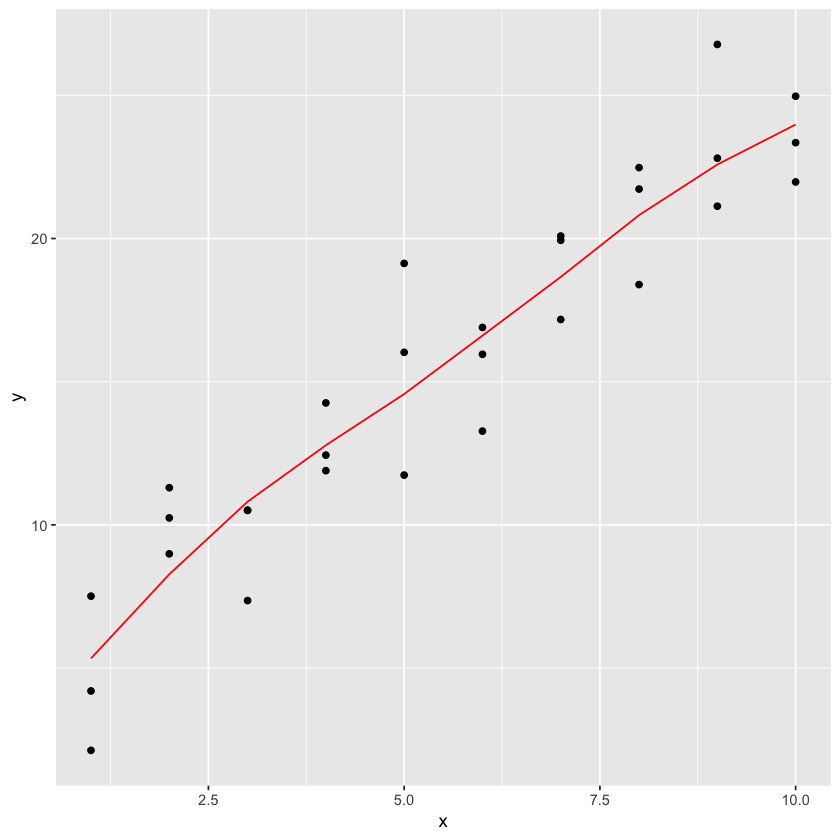

In [120]:
plot_sim1_loess <-
  ggplot(sim1, aes(x = x, y = y)) +
  geom_point() +
  geom_line(aes(x = x, y = pred), data = grid_loess, colour = "red")
plot_sim1_loess

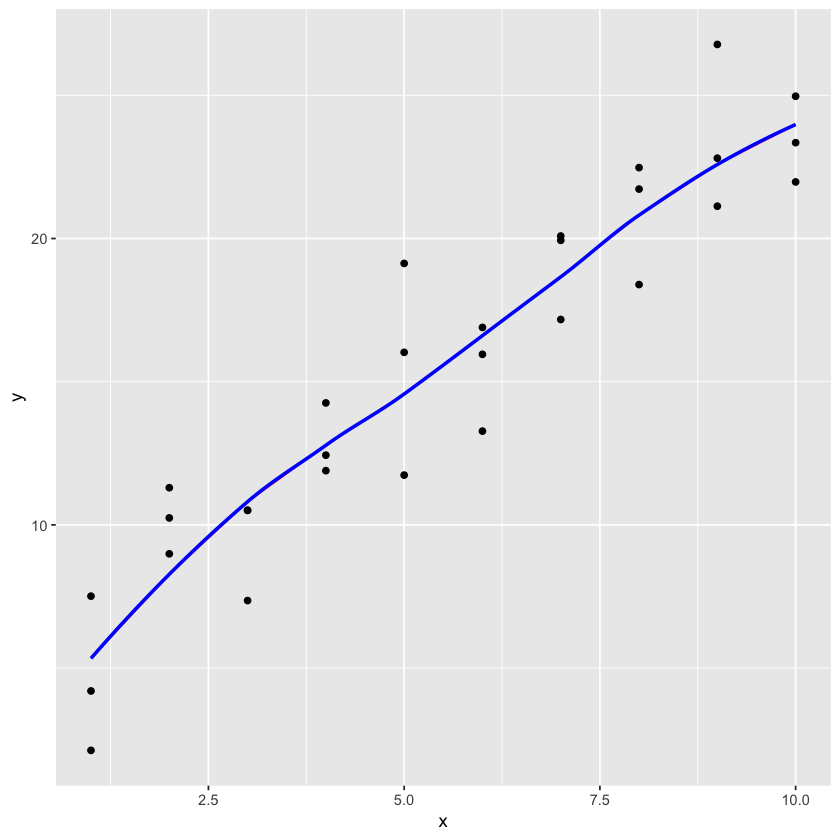

In [121]:
plot_sim1_loess +
  geom_smooth(method = "loess", colour = "blue", se = FALSE, alpha = 0.20)

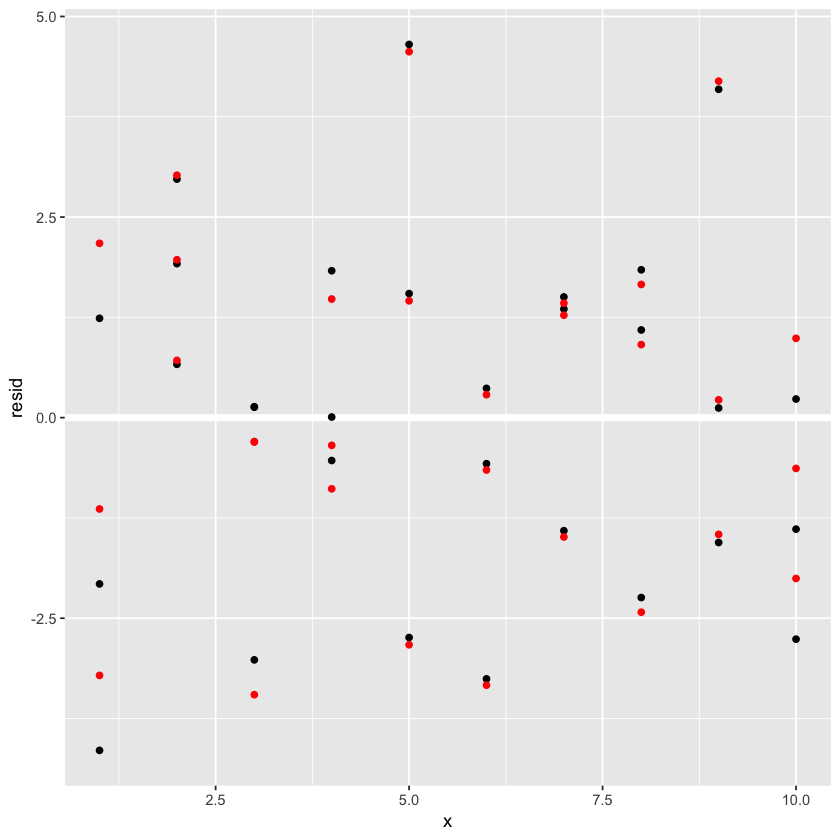

In [122]:
ggplot(sim1, aes(x = x)) +
  geom_ref_line(h = 0) +
  geom_point(aes(y = resid)) +
  geom_point(aes(y = resid_loess), colour = "red")

In [123]:
sim1_mod <- lm(y ~ x, data = sim1)
grid <- sim1 %>%
  data_grid(x)

In [124]:
grid %>%
  add_predictions(sim1_mod, var = "pred_lm") %>%
  add_predictions(sim1_loess, var = "pred_loess")

x,pred_lm,pred_loess
1,6.272355,5.338000
2,8.323888,8.274913
3,10.375421,10.809582
4,12.426954,12.779762
5,14.478487,14.569125
6,16.530020,16.608674
7,18.581553,18.659348
8,20.633087,20.815760
9,22.684620,22.583429
10,24.736153,23.979611


In [125]:
grid %>%
  gather_predictions(sim1_mod, sim1_loess)

model,x,pred
sim1_mod,1,6.272355
sim1_mod,2,8.323888
sim1_mod,3,10.375421
sim1_mod,4,12.426954
sim1_mod,5,14.478487
sim1_mod,6,16.530020
sim1_mod,7,18.581553
sim1_mod,8,20.633087
sim1_mod,9,22.684620
sim1_mod,10,24.736153


In [126]:
grid %>%
  spread_predictions(sim1_mod, sim1_loess)

x,sim1_mod,sim1_loess
1,6.272355,5.338000
2,8.323888,8.274913
3,10.375421,10.809582
4,12.426954,12.779762
5,14.478487,14.569125
6,16.530020,16.608674
7,18.581553,18.659348
8,20.633087,20.815760
9,22.684620,22.583429
10,24.736153,23.979611


In [127]:
grid %>%
  gather_predictions(sim1_mod, sim1_loess) %>%
  spread(model, pred)

x,sim1_loess,sim1_mod
1,5.338000,6.272355
2,8.274913,8.323888
3,10.809582,10.375421
4,12.779762,12.426954
5,14.569125,14.478487
6,16.608674,16.530020
7,18.659348,18.581553
8,20.815760,20.633087
9,22.583429,22.684620
10,23.979611,24.736153


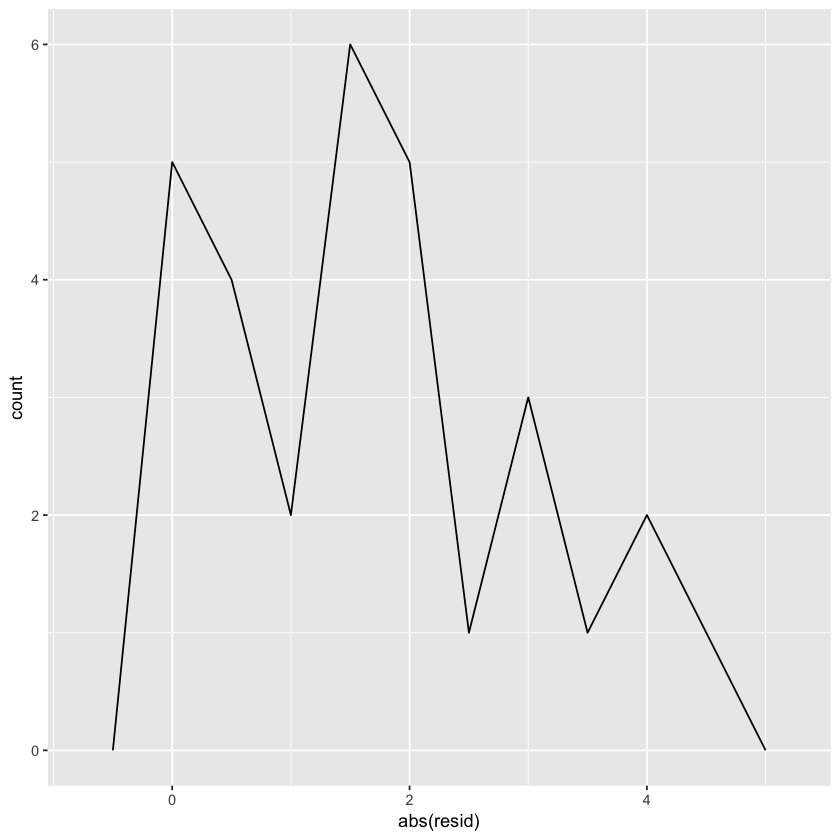

In [128]:
sim1_mod <- lm(y ~ x, data = sim1)

sim1 <- sim1 %>%
  add_residuals(sim1_mod)

ggplot(sim1, aes(x = abs(resid))) +
  geom_freqpoly(binwidth = 0.5)

In [129]:
df <- tribble(
  ~y, ~x1, ~x2,
  4, 2, 5,
  5, 1, 6
)
model_matrix(df, y ~ x1)

(Intercept),x1
1,2
1,1


In [130]:
model_matrix(df, y ~ x1 - 1)

x1
2
1


In [131]:
model_matrix(df, y ~ x1 + x2)

(Intercept),x1,x2
1,2,5
1,1,6


This formula notation is sometimes called “Wilkinson-Rogers notation”, and was initially described in Symbolic Description of Factorial Models for Analysis of Variance, by G. N. Wilkinson and C. E. Rogers https://www.jstor.org/stable/2346786. It’s worth digging up and reading the original paper if you’d like to understand the full details of the modelling algebra.

The following sections expand on how this formula notation works for categorical variables, interactions, and transformation.

In [132]:
df <- tribble(
  ~ sex, ~ response,
  "male", 1,
  "female", 2,
  "male", 1
)
model_matrix(df, response ~ sex)

(Intercept),sexmale
1,1
1,0
1,1


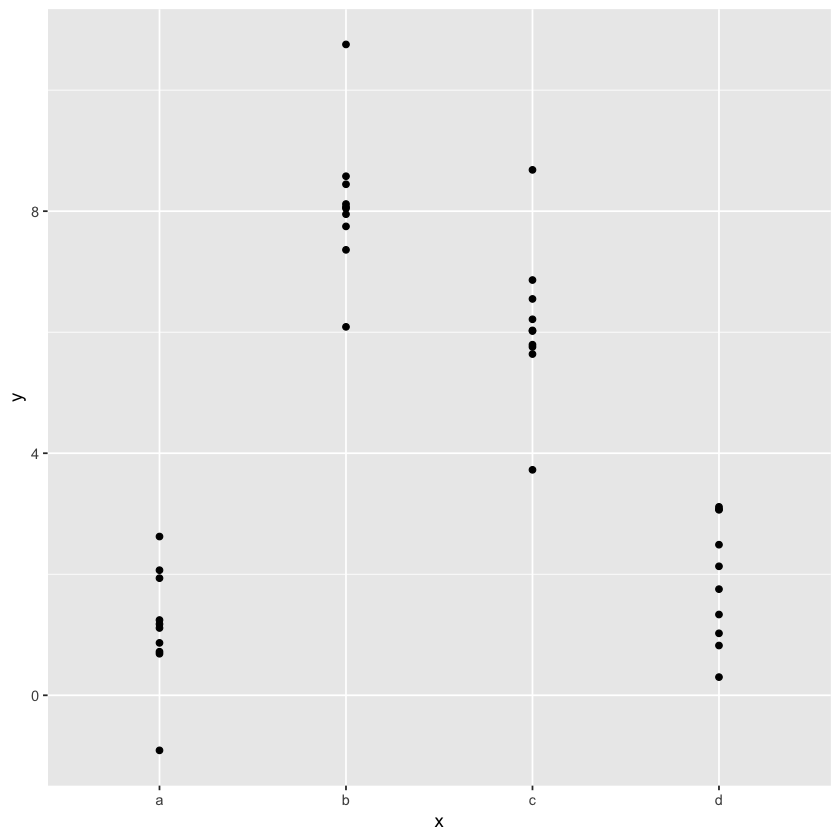

In [133]:
ggplot(sim2) + 
  geom_point(aes(x, y))

In [134]:
mod2 <- lm(y ~ x, data = sim2)

grid <- sim2 %>% 
  data_grid(x) %>% 
  add_predictions(mod2)
grid

x,pred
a,1.152166
b,8.116039
c,6.127191
d,1.910981


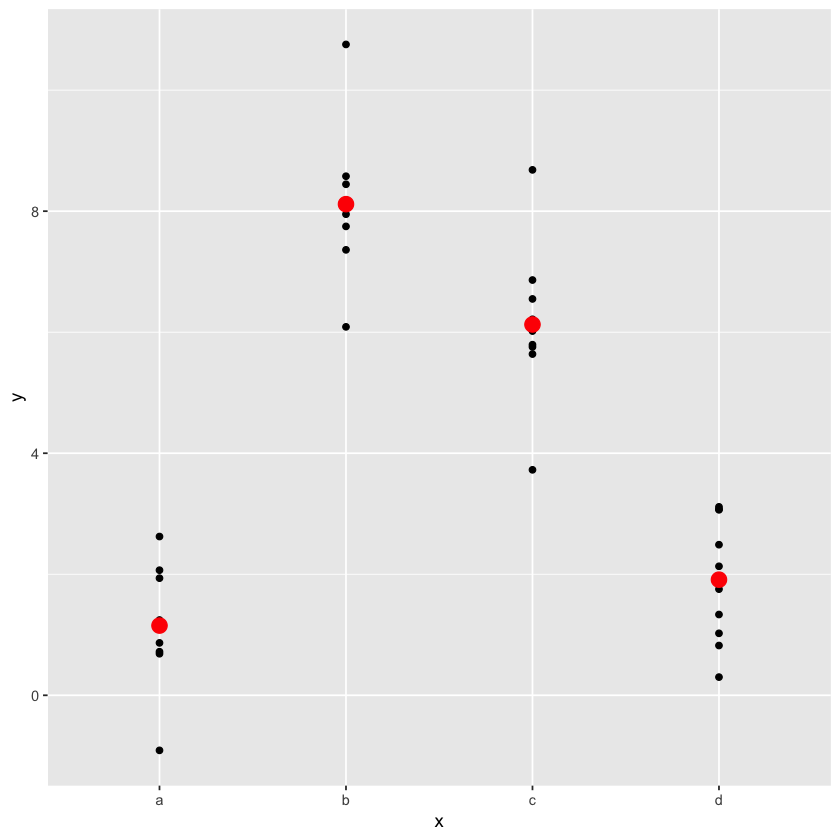

In [135]:
ggplot(sim2, aes(x)) + 
  geom_point(aes(y = y)) +
  geom_point(data = grid, aes(y = pred), colour = "red", size = 4)

In [136]:
tibble(x = "e") %>% 
  add_predictions(mod2)

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor x has new level e


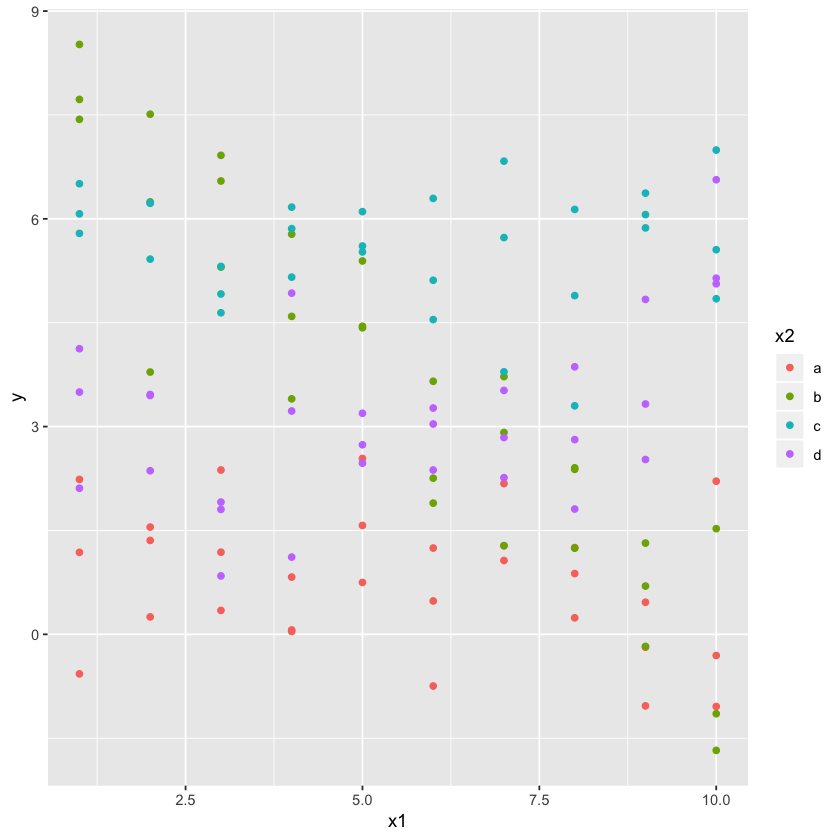

In [137]:
ggplot(sim3, aes(x1, y)) + 
  geom_point(aes(colour = x2))

In [138]:
mod1 <- lm(y ~ x1 + x2, data = sim3)
mod2 <- lm(y ~ x1 * x2, data = sim3)

In [139]:
grid <- sim3 %>% 
  data_grid(x1, x2) %>% 
  gather_predictions(mod1, mod2)
grid

model,x1,x2,pred
mod1,1,a,1.6749281
mod1,1,b,4.5627390
mod1,1,c,6.4806640
mod1,1,d,4.0345149
mod1,2,a,1.4781904
mod1,2,b,4.3660012
mod1,2,c,6.2839262
mod1,2,d,3.8377771
mod1,3,a,1.2814526
mod1,3,b,4.1692635


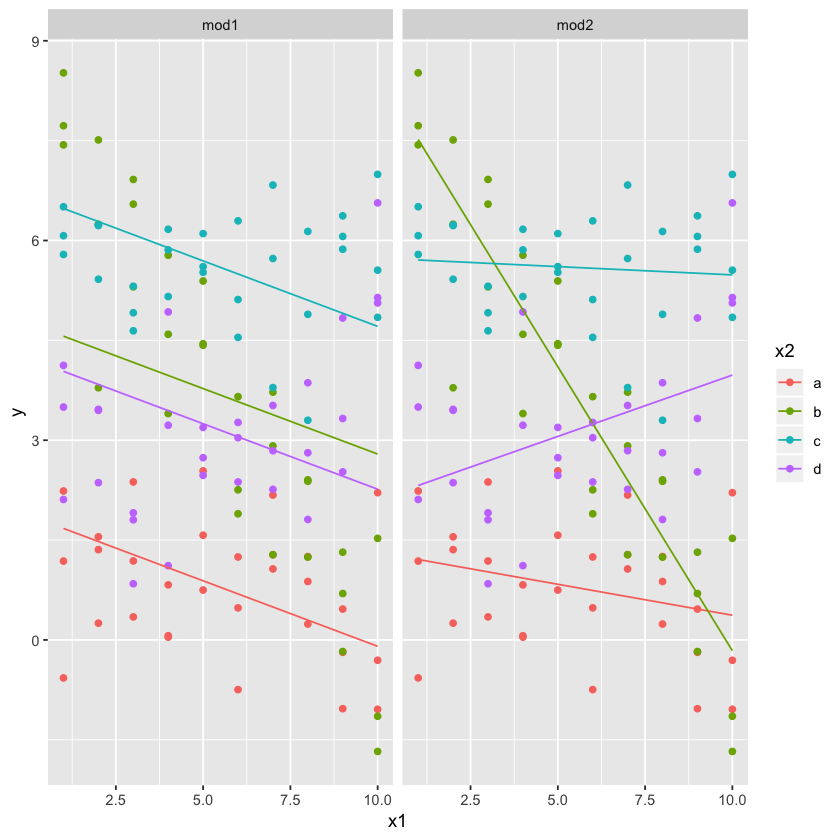

In [140]:
ggplot(sim3, aes(x1, y, colour = x2)) + 
  geom_point() + 
  geom_line(data = grid, aes(y = pred)) + 
  facet_wrap(~ model)

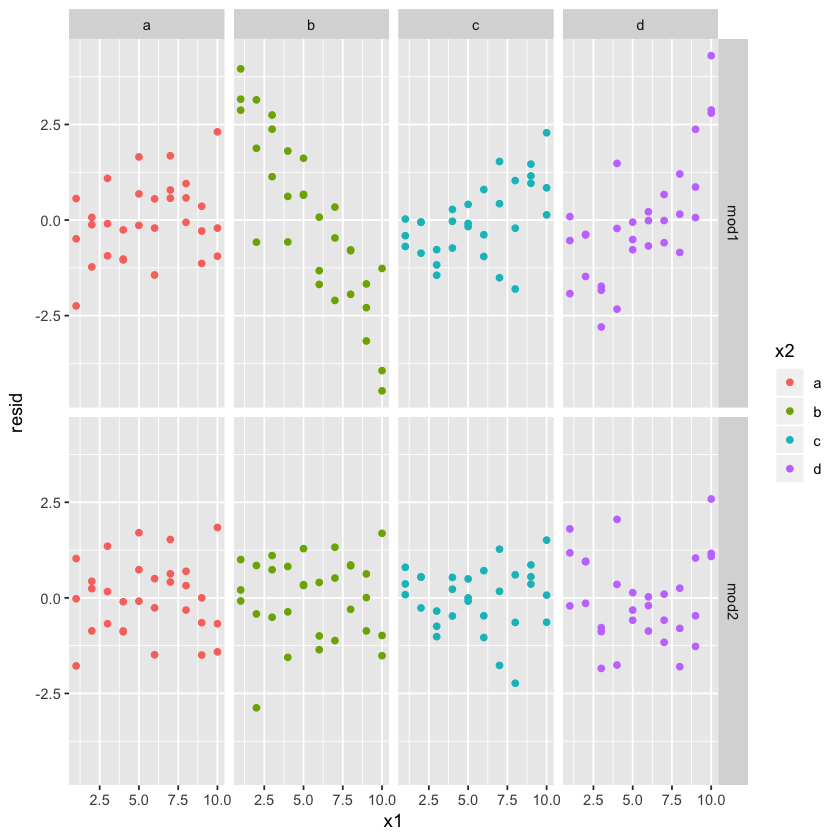

In [141]:
sim3 <- sim3 %>% 
  gather_residuals(mod1, mod2)

ggplot(sim3, aes(x1, resid, colour = x2)) + 
  geom_point() + 
  facet_grid(model ~ x2)

In [142]:
mod1 <- lm(y ~ x1 + x2, data = sim4)
mod2 <- lm(y ~ x1 * x2, data = sim4)

grid <- sim4 %>% 
  data_grid(
    x1 = seq_range(x1, 5), 
    x2 = seq_range(x2, 5) 
  ) %>% 
  gather_predictions(mod1, mod2)
grid

model,x1,x2,pred
mod1,-1.0,-1.0,0.99630938
mod1,-1.0,-0.5,-0.39494837
mod1,-1.0,0.0,-1.78620613
mod1,-1.0,0.5,-3.17746388
mod1,-1.0,1.0,-4.56872164
mod1,-0.5,-1.0,1.90714243
mod1,-0.5,-0.5,0.51588467
mod1,-0.5,0.0,-0.87537308
mod1,-0.5,0.5,-2.26663084
mod1,-0.5,1.0,-3.65788859


In [143]:
seq_range(c(0.0123, 0.923423), n = 5)
seq_range(c(0.0123, 0.923423), n = 5, pretty = TRUE)

[1] 0.0123000 0.2400808 0.4678615 0.6956423 0.9234230

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [144]:
x1 <- rcauchy(100)
seq_range(x1, n = 5)
seq_range(x1, n = 5, trim = 0.10)
seq_range(x1, n = 5, trim = 0.25)
seq_range(x1, n = 5, trim = 0.50)

[1] -16.758154  -5.922937   4.912279  15.747496  26.582713

[1] -3.2806210 -0.6958223  1.8889765  4.4737753  7.0585740

[1] -2.4578725 -0.9994768  0.4589188  1.9173144  3.3757100

[1] -0.9711218 -0.4035966  0.1639287  0.7314539  1.2989792

In [145]:
x2 <- c(0, 1)
seq_range(x2, n = 5)
seq_range(x2, n = 5, expand = 0.10)
seq_range(x2, n = 5, expand = 0.25)
seq_range(x2, n = 5, expand = 0.50)

[1] 0.00 0.25 0.50 0.75 1.00

[1] -0.050  0.225  0.500  0.775  1.050

[1] -0.1250  0.1875  0.5000  0.8125  1.1250

[1] -0.250  0.125  0.500  0.875  1.250

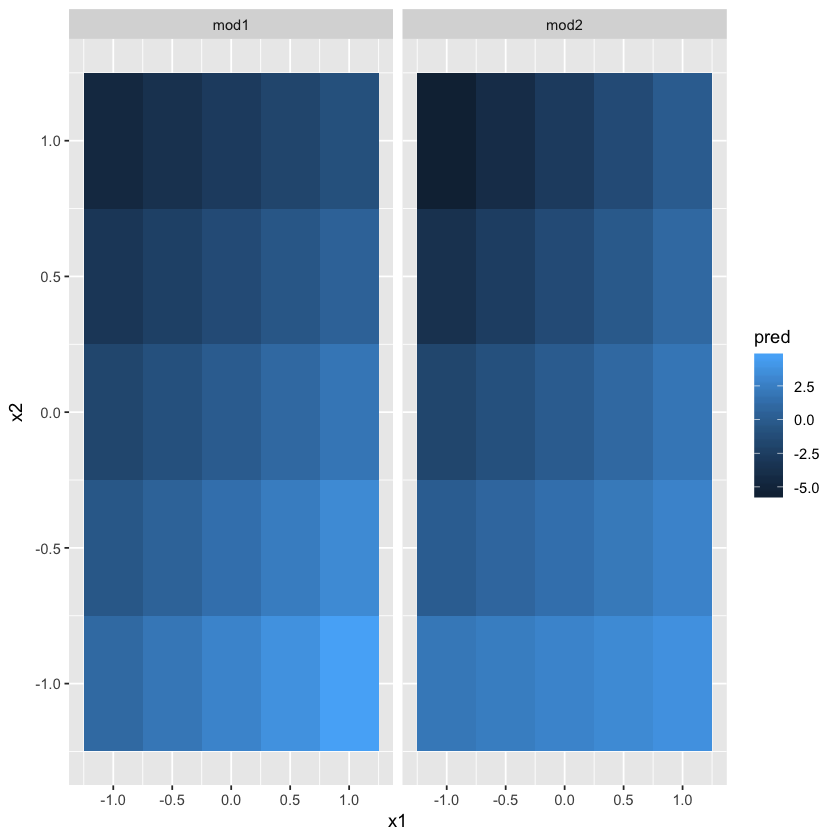

In [146]:
ggplot(grid, aes(x1, x2)) + 
  geom_tile(aes(fill = pred)) + 
  facet_wrap(~ model)

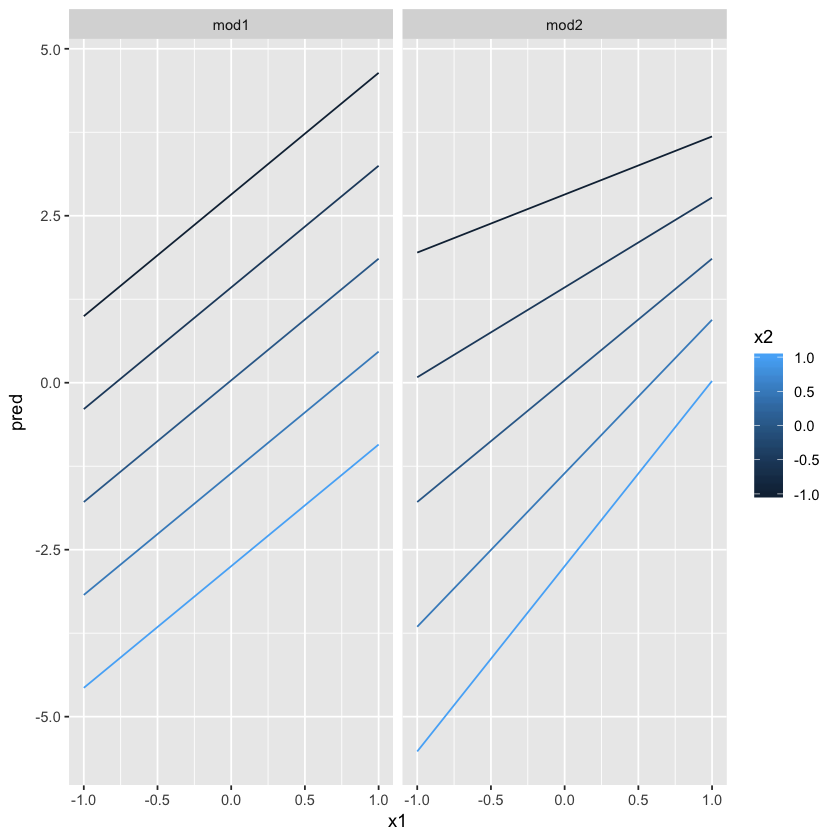

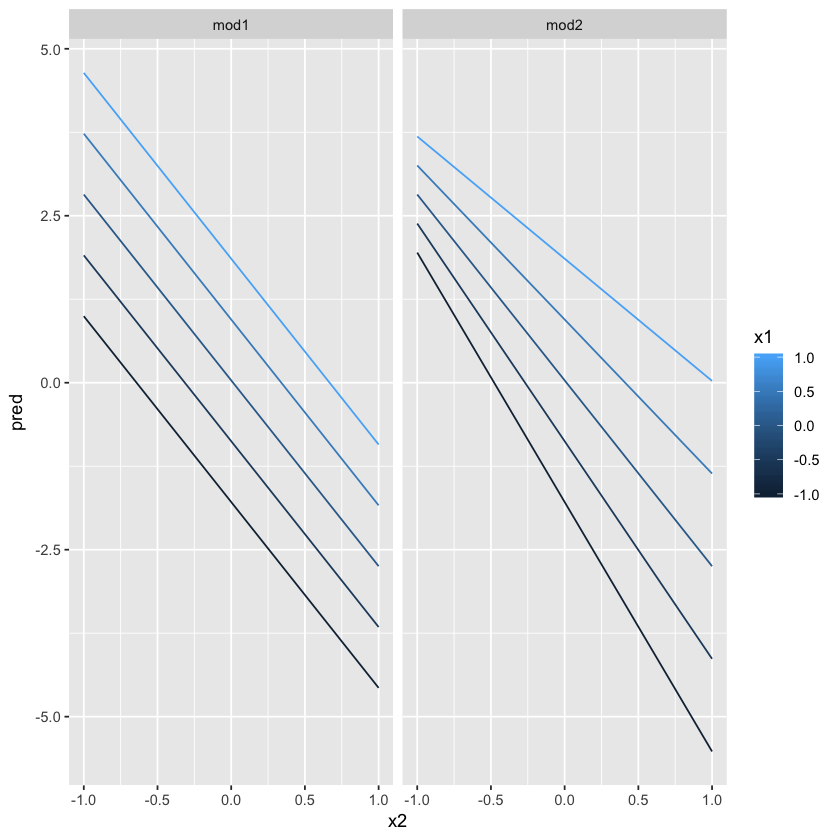

In [147]:
ggplot(grid, aes(x1, pred, colour = x2, group = x2)) + 
  geom_line() +
  facet_wrap(~ model)
ggplot(grid, aes(x2, pred, colour = x1, group = x1)) + 
  geom_line() +
  facet_wrap(~ model)

In [148]:
df <- tribble(
  ~y, ~x,
   1,  1,
   2,  2, 
   3,  3
)
model_matrix(df, y ~ x^2 + x)
model_matrix(df, y ~ I(x^2) + x)

(Intercept),x
1,1
1,2
1,3


(Intercept),I(x^2),x
1,1,1
1,4,2
1,9,3


In [149]:
model_matrix(df, y ~ poly(x, 2))

(Intercept),"poly(x, 2)1","poly(x, 2)2"
1,-7.071068e-01,0.4082483
1,-7.850462e-17,-0.8164966
1,7.071068e-01,0.4082483


In [150]:
library(splines)
model_matrix(df, y ~ ns(x, 2))

(Intercept),"ns(x, 2)1","ns(x, 2)2"
1,0.0000000,0.0000000
1,0.5662628,-0.2108419
1,0.3440969,0.7706021


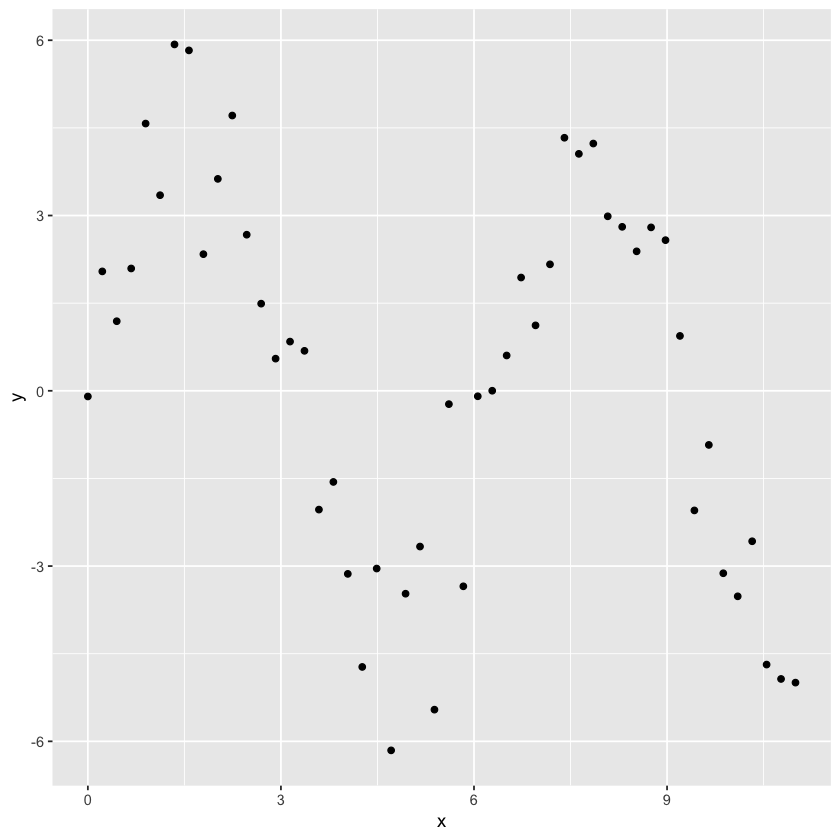

In [151]:
sim5 <- tibble(
  x = seq(0, 3.5 * pi, length = 50),
  y = 4 * sin(x) + rnorm(length(x))
)

ggplot(sim5, aes(x, y)) +
  geom_point()

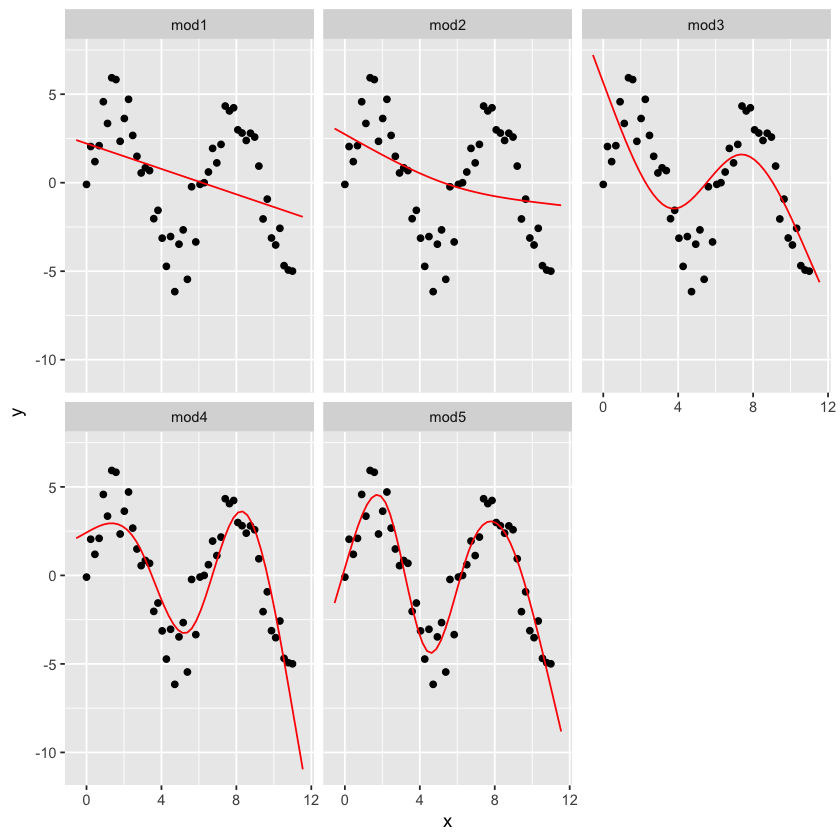

In [153]:
mod1 <- lm(y ~ ns(x, 1), data = sim5)
mod2 <- lm(y ~ ns(x, 2), data = sim5)
mod3 <- lm(y ~ ns(x, 3), data = sim5)
mod4 <- lm(y ~ ns(x, 4), data = sim5)
mod5 <- lm(y ~ ns(x, 5), data = sim5)

grid <- sim5 %>% 
  data_grid(x = seq_range(x, n = 50, expand = 0.1)) %>% 
  gather_predictions(mod1, mod2, mod3, mod4, mod5, .pred = "y")

ggplot(sim5, aes(x, y)) + 
  geom_point() +
  geom_line(data = grid, colour = "red") +
  facet_wrap(~ model)

In [154]:
mod2a <- lm(y ~ x - 1, data = sim2)
mod2 <- lm(y ~ x, data = sim2)

In [155]:
grid <- sim2 %>%
  data_grid(x) %>%
  spread_predictions(mod2, mod2a)
grid

x,mod2,mod2a
a,1.152166,1.152166
b,8.116039,8.116039
c,6.127191,6.127191
d,1.910981,1.910981


In [156]:
x3 <- model_matrix(y ~ x1 * x2, data = sim3)
x3

(Intercept),x1,x2b,x2c,x2d,x1:x2b,x1:x2c,x1:x2d
1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
1,1,1,0,0,1,0,0
1,1,1,0,0,1,0,0
1,1,1,0,0,1,0,0
1,1,0,1,0,0,1,0
1,1,0,1,0,0,1,0
1,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1


In [157]:
all(x3[["x1:x2b"]] == (x3[["x1"]] * x3[["x2b"]]))

[1] TRUE

In [158]:
all(x3[["x1:x2c"]] == (x3[["x1"]] * x3[["x2c"]]))
all(x3[["x1:x2d"]] == (x3[["x1"]] * x3[["x2d"]]))

[1] TRUE

[1] TRUE

In [159]:
x4 <- model_matrix(y ~ x1 * x2, data = sim4)
x4

(Intercept),x1,x2,x1:x2
1,-1,-1.0000000,1.0000000
1,-1,-1.0000000,1.0000000
1,-1,-1.0000000,1.0000000
1,-1,-0.7777778,0.7777778
1,-1,-0.7777778,0.7777778
1,-1,-0.7777778,0.7777778
1,-1,-0.5555556,0.5555556
1,-1,-0.5555556,0.5555556
1,-1,-0.5555556,0.5555556
1,-1,-0.3333333,0.3333333


In [160]:
all(x4[["x1"]] * x4[["x2"]] == x4[["x1:x2"]])

[1] TRUE

In [161]:
mod1 <- lm(y ~ x1 + x2, data = sim3)
mod2 <- lm(y ~ x1 * x2, data = sim3)

In [162]:
levels(sim3$x2)

[1] "a" "b" "c" "d"

In [163]:
mod1 <- lm(y ~ x1 + x2, data = sim3)
mod2 <- lm(y ~ x1 * x2, data = sim3)

In [164]:
model_matrix_mod1 <- function(.data) {
  mutate(.data,
    x2b = as.numeric(x2 == "b"),
    x2c = as.numeric(x2 == "c"),
    x2d = as.numeric(x2 == "d"),
    `(Intercept)` = 1
  ) %>%
    select(`(Intercept)`, x1, x2b, x2c, x2d)
}

In [165]:
model_matrix_mod1(sim3)

(Intercept),x1,x2b,x2c,x2d
1,1,0,0,0
1,1,0,0,0
1,1,0,0,0
1,1,1,0,0
1,1,1,0,0
1,1,1,0,0
1,1,0,1,0
1,1,0,1,0
1,1,0,1,0
1,1,0,0,1


In [166]:
model_matrix_mod1b <- function(.data) {
  # the levels of x2
  lvls <- levels(.data$x2)
  # drop the first level
  # this assumes that there are at least two levels
  lvls <- lvls[2:length(lvls)]
  # create an indicator variable for each level of x2
  for (lvl in lvls) {
    # new column name x2 + level name
    varname <- str_c("x2", lvl)
    # add indicator variable for lvl
    .data[[varname]] <- as.numeric(.data$x2 == lvl)
  }
  # generate the list of variables to keep
  x2_variables <- str_c("x2", lvls)
  # Add an intercept
  .data[["(Intercept)"]] <- 1
  # keep x1 and x2 indicator variables
  select(.data, `(Intercept)`, x1, one_of(x2_variables))
}

In [167]:
model_matrix_mod1b(sim3)

(Intercept),x1,x2b,x2c,x2d
1,1,0,0,0
1,1,0,0,0
1,1,0,0,0
1,1,1,0,0
1,1,1,0,0
1,1,1,0,0
1,1,0,1,0
1,1,0,1,0
1,1,0,1,0
1,1,0,0,1


In [ ]:
model_matrix_mod2 <- function(.data) {
  mutate(.data,
    `(Intercept)` = 1,
    x2b = as.numeric(x2 == "b"),
    x2c = as.numeric(x2 == "c"),
    x2d = as.numeric(x2 == "d"),
    `x1:x2b` = x1 * x2b,
    `x1:x2c` = x1 * x2c,
    `x1:x2d` = x1 * x2d
  ) %>%
    select(`(Intercept)`, x1, x2b, x2c, x2d, `x1:x2b`, `x1:x2c`, `x1:x2d`)
}

In [ ]:
model_matrix_mod2(sim3)

In [ ]:
model_matrix_mod2b <- function(.data) {
  # get dataset with x1 and x2 indicator variables
  out <- model_matrix_mod1b(.data)
  # get names of the x2 indicator columns
  x2cols <- str_subset(colnames(out), "^x2")
  # create interactions between x1 and the x2 indicator columns
  for (varname in x2cols) {
    # name of the interaction variable
    newvar <- str_c("x1:", varname)
    out[[newvar]] <- out$x1 * out[[varname]]
  }
  out
}

In [ ]:
model_matrix_mod2b(sim3)

In [ ]:
mod1 <- lm(y ~ x1 + x2, data = sim4)
mod2 <- lm(y ~ x1 * x2, data = sim4)

In [ ]:
sim4_mods <- gather_residuals(sim4, mod1, mod2)

In [ ]:
ggplot(sim4_mods, aes(x = resid, colour = model)) +
  geom_freqpoly(binwidth = 0.5) +
  geom_rug()

In [ ]:
ggplot(sim4_mods, aes(x = abs(resid), colour = model)) +
  geom_freqpoly(binwidth = 0.5) +
  geom_rug()

In [ ]:
sim4_mods %>%
  group_by(model) %>%
  summarise(resid = sd(resid))

In [ ]:
df <- tribble(
  ~x, ~y,
  1, 2.2,
  2, NA,
  3, 3.5,
  4, 8.3,
  NA, 10
)

mod <- lm(y ~ x, data = df)

In [ ]:
mod <- lm(y ~ x, data = df, na.action = na.exclude)

In [ ]:
nobs(mod)